# Shapiro-Wilk test for normal and lognormal distributions

In [1]:
import sandy

In [2]:
import logging
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
logging.getLogger().setLevel(logging.WARN)

Generate 5000 xs samples normally and log-normally distributed

In [5]:
tape = sandy.get_endf6_file("jeff_33", "xs", 10010)
njoy_kws = dict(err=1, errorr33_kws=dict(mt=102))
nsmp = 5000
seed = 5

smp_norm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="normal"))[33]
smp_lognorm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="lognormal"))[33]
smp_uniform = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="uniform"))[33]


 njoy 2016.71  14Jul23                                       08/22/23 12:12:21
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.0s

 moder...                                                                 0.0s

 errorr...                                                                0.0s

 processing mat   125
 ---------------------
   1-H -  1 LANL       EVAL-OCT05 G.M.Hale                           

 covariances calculated for  1 reactions and  251 groups                  0.0s
                                                                          0.1s
 *****************************************************************************

 njoy 2016.71  14Jul23                                       08/22/23 12:12:21
 *****************************************************************************

 moder.

##  Shapiro-Wilk test normal samples and normal distribution

In [6]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = smp_norm.test_shapiro(pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = smp_norm.test_shapiro(pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

/opt/hostedtoolcache/Python/3.11.4/x64/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/hostedtoolcache/Python/3.11.4/x64/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/hostedtoolcache/Python/3.11.4/x64/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/hostedtoolcache/Python/3.11.4/x64/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/hostedtoolcache/Python/3.11.4/x64/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/hostedtoolcache/Python/3.

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,6.89505e-01,6.57457e-04,9.23459e-01,8.40779e-45
50,9.76197e-01,4.04932e-01,9.23459e-01,8.40779e-45
100,9.87374e-01,4.63279e-01,9.23459e-01,8.40779e-45
500,9.86626e-01,1.50228e-04,9.23459e-01,8.40779e-45
1000,9.88225e-01,3.42968e-07,9.23459e-01,8.40779e-45
5000,9.90185e-01,3.71500e-18,9.23459e-01,8.40779e-45


### Plot the distribution of the parameter with closest and farthest resemblance to a normal PDF

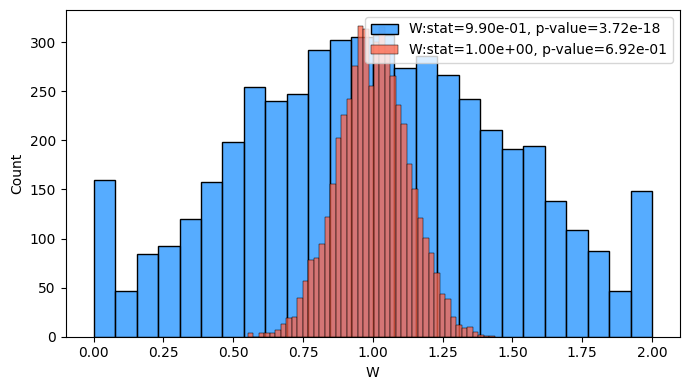

In [7]:
test = smp_norm.test_shapiro(pdf="normal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()

## Shapiro-Wilk test for lognormal samples and lognormal distribution

In [8]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = smp_lognorm.test_shapiro(pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = smp_lognorm.test_shapiro(pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,8.57166e-01,7.06498e-02,9.99586e-01,3.80364e-01
50,9.05722e-01,7.46487e-04,9.99586e-01,3.80364e-01
100,9.42251e-01,2.65199e-04,9.99586e-01,3.80364e-01
500,9.15559e-01,4.32528e-16,9.99586e-01,3.80364e-01
1000,8.89965e-01,4.33435e-26,9.99586e-01,3.80364e-01
5000,9.01739e-01,0.00000e+00,9.99586e-01,3.80364e-01


### Plot the distribution of the parameter with closest and farthest resemblance to a lognormal PDF

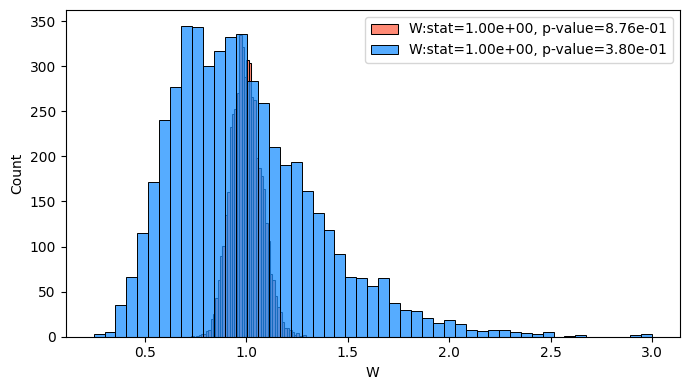

In [9]:
test = smp_lognorm.test_shapiro(pdf="lognormal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()

## Shapiro-Wilk test for uniform samples and normal distribution

In [10]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = smp_uniform.test_shapiro(pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = smp_uniform.test_shapiro(pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,7.01850e-01,9.27593e-04,9.08091e-01,0.00000e+00
50,8.92741e-01,2.79088e-04,9.08091e-01,0.00000e+00
100,9.08595e-01,3.66984e-06,9.08091e-01,0.00000e+00
500,9.39673e-01,2.30583e-13,9.08091e-01,0.00000e+00
1000,9.42486e-01,2.97285e-19,9.08091e-01,0.00000e+00
5000,9.50787e-01,4.99444e-38,9.08091e-01,0.00000e+00


### Plot the distribution of the parameter with closest and farthest resemblance to a uniform PDF

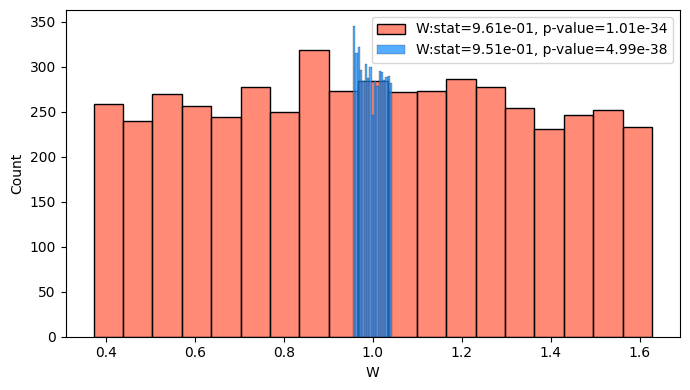

In [11]:
test = smp_uniform.test_shapiro(pdf="uniform", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_uniform.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_uniform.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()